In [13]:
import matplotlib.pyplot as plt 
import pandas as pd 
import statsmodels.api as sm

data = pd.read_csv("auto-mpg.csv") 
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [14]:
data = data.drop(columns=['car name'])

In [15]:
data.corr()['mpg']

mpg             1.000000
cylinders      -0.777618
displacement   -0.805127
horsepower     -0.778427
weight         -0.832244
acceleration    0.423329
model year      0.580541
origin          0.565209
Name: mpg, dtype: float64

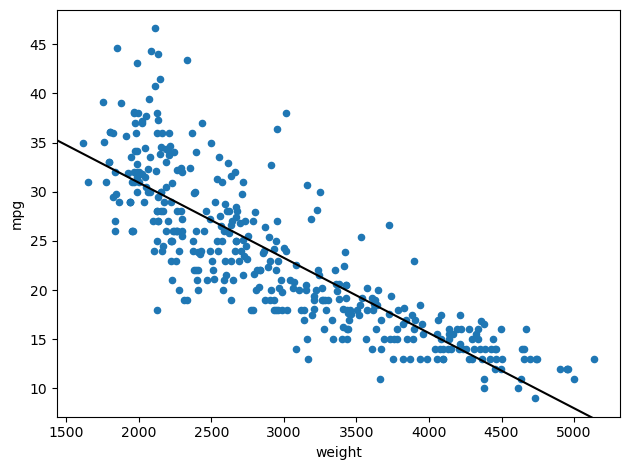

In [25]:
fig, ax= plt.subplots()
data.plot.scatter(x="weight",y="mpg", ax=ax)
sm.graphics.abline_plot(model_results=baseline_results,label="regression line", ax=ax, color="black")
plt.tight_layout()

In [17]:
y = data["mpg"]
X_baseline = data[["weight"]]

In [18]:
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Mon, 29 Jul 2024   Prob (F-statistic):          6.02e-102
Time:                        20:52:36   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2165      0.799     57.867      0.0

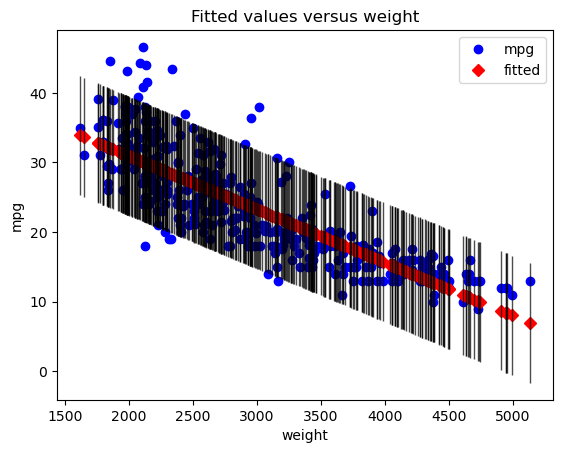

In [19]:
sm.graphics.plot_fit(baseline_results,"weight") 
plt.show()

In [21]:
X_second = data[["weight","model year"]]
X_second.tail()

,weight,model year
387,2790,82
388,2130,82
389,2295,82
390,2625,82
391,2720,82


In [22]:
second_model = sm.OLS(y ,sm.add_constant(X_second)) 
second_results = second_model.fit()
print(second_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     819.5
Date:                Mon, 29 Jul 2024   Prob (F-statistic):          3.33e-140
Time:                        20:55:26   Log-Likelihood:                -1037.6
No. Observations:                 392   AIC:                             2081.
Df Residuals:                     389   BIC:                             2093.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.3473      4.007     -3.581      0.0

the model explains about 81% of the variance in MPG

In [23]:
data['model year'].value_counts(sort=False)

model year
70    29
71    27
72    28
73    40
74    26
75    30
76    34
77    28
78    36
79    29
80    27
81    28
82    30
Name: count, dtype: int64

the dataset is from 1983,it is reasonable to assume that these represent years from 1970 to 1982
zero for a model year means zero

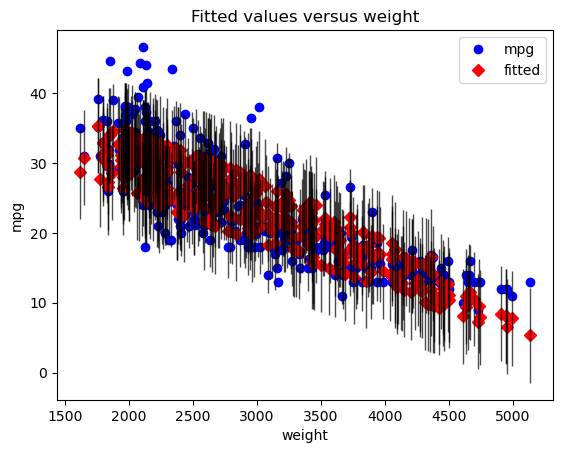

In [24]:
sm.graphics.plot_fit(second_results, "weight") 

plt.show()

the red dots predictions are made based on the entire  model,not just the predictor,also shows the marginal contribution of the particular predictor

c:\Users\pc\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)


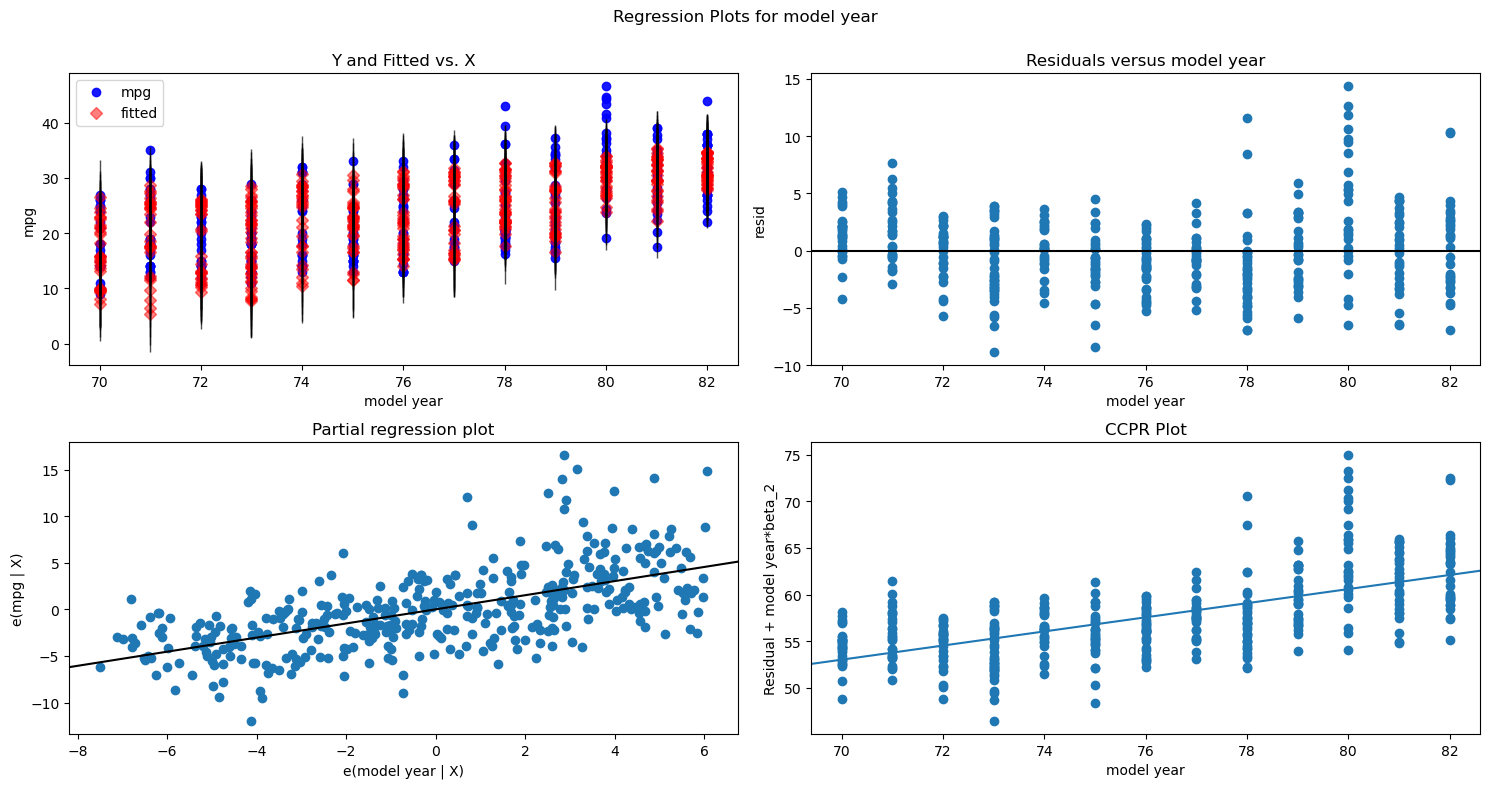

In [26]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(second_results,"model year", fig=fig)
plt.show()

In [27]:
X_all = data.drop("mpg",axis = 1).select_dtypes("number") 
X_all

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...
387,4,140.0,86,2790,15.6,82,1
388,4,97.0,52,2130,24.6,82,2
389,4,135.0,84,2295,11.6,82,1
390,4,120.0,79,2625,18.6,82,1


In [28]:
third_model = sm.OLS(y, sm.add_constant(X_all)) 
third_results = third_model.fit() 
print(third_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          2.04e-139
Time:                        08:03:27   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

In [29]:
from sklearn.linear_model import LinearRegression 
sklearn_baseline_model = LinearRegression()
sklearn_baseline_model.fit(X_baseline, y)
print(f"""
StatsModels R-Squared:    {baseline_results.rsquared}
scikit-learn R-Squared:   {sklearn_baseline_model.score(X_baseline, y)}

StatsModels intercept:    {baseline_results.params["const"]}
scikit-learn intercept:   {sklearn_baseline_model.intercept_}

StatsModels coefficient:  {baseline_results.params["weight"]}
scikit-learn coefficient: {sklearn_baseline_model.coef_[0]}
""")


StatsModels R-Squared:    0.6926304331206254
scikit-learn R-Squared:   0.6926304331206254

StatsModels intercept:    46.2165245490176
scikit-learn intercept:   46.21652454901758

StatsModels coefficient:  -0.00764734253577958
scikit-learn coefficient: -0.007647342535779581

